In [1]:
!pip install openeo
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.7.1
    Uninstalling xarray-2025.7.1:
      Successfully uninstalled xarray-2025.7.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.7 MB/s eta 0:00:00


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo

Conectarse al API usando los datos de usuario y contraseña

In [3]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=DSEI-BIUM 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


In [4]:
#Areas de interes
lago_atitlan = {
  "west": -91.326256,
  "east": -91.07151,
  "south": 14.5948,
  "north": 14.750979
}

Cargando las coordeanadas de Guatemala

In [7]:
atitlan_cube = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=lago_atitlan,  # Región de Guatemala
    temporal_extent=["2025-05-01", "2025-08-01"], # minimo 3 meses (Lynette lo autorizo en la clase, porque la descarga era muy larga con 6)
    bands=["B02","B03","B04", "B08"]
)

Descargar las imagenes

In [8]:
result_graph = atitlan_cube.save_result(format="GTIFF")
job = connection.create_job(result_graph)
job.start_and_wait()
job.download_results("/content/Bandas_Atitlan.tif")

0:00:00 Job 'j-2508072204504141bb6c6ef46b3dce3b': send 'start'
0:00:13 Job 'j-2508072204504141bb6c6ef46b3dce3b': created (progress 0%)
0:00:18 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:00:25 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:00:33 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:00:43 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:00:55 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:01:11 Job 'j-2508072204504141bb6c6ef46b3dce3b': queued (progress 0%)
0:01:30 Job 'j-2508072204504141bb6c6ef46b3dce3b': running (progress N/A)
0:01:54 Job 'j-2508072204504141bb6c6ef46b3dce3b': running (progress N/A)
0:02:24 Job 'j-2508072204504141bb6c6ef46b3dce3b': running (progress N/A)
0:03:02 Job 'j-2508072204504141bb6c6ef46b3dce3b': running (progress N/A)
0:03:48 Job 'j-2508072204504141bb6c6ef46b3dce3b': running (progress N/A)
0:04:47 Job 'j-2508072204504141bb6c6ef46b3dce3b': finished (progress 100%)

/tmp/ipython-input-3920669889.py:4: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results("/content/Bandas_Atitlan.tif")
/usr/local/lib/python3.11/dist-packages/openeo/rest/job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
/usr/local/lib/python3.11/dist-packages/openeo/rest/job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


{PosixPath('/content/Bandas_Atitlan.tif'): {'bands': [{'eo:center_wavelength': 0.4924,
    'eo:common_name': 'blue',
    'name': 'B02'},
   {'eo:center_wavelength': 0.5598, 'eo:common_name': 'green', 'name': 'B03'},
   {'eo:center_wavelength': 0.6646, 'eo:common_name': 'red', 'name': 'B04'},
   {'eo:center_wavelength': 0.8328, 'eo:common_name': 'nir', 'name': 'B08'}],
  'eo:bands': [{'center_wavelength': 0.4924,
    'common_name': 'blue',
    'name': 'B02'},
   {'center_wavelength': 0.5598, 'common_name': 'green', 'name': 'B03'},
   {'center_wavelength': 0.6646, 'common_name': 'red', 'name': 'B04'},
   {'center_wavelength': 0.8328, 'common_name': 'nir', 'name': 'B08'}],
  'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/jobs/j-2508072204504141bb6c6ef46b3dce3b/results/assets/ZjUwMTRkY2EtOGY2ZS00MWEyLTkzYTEtMmY5ODMzZjZlNjhk/a966171bea98994efab27eeba927e563/openEO_2025-07-30Z.tif?expires=1755209378',
  'proj:bbox': [680160, 1614170, 707750, 1631680],
  'proj:epsg': 32615,
  'pro

Visualizar lo descargado

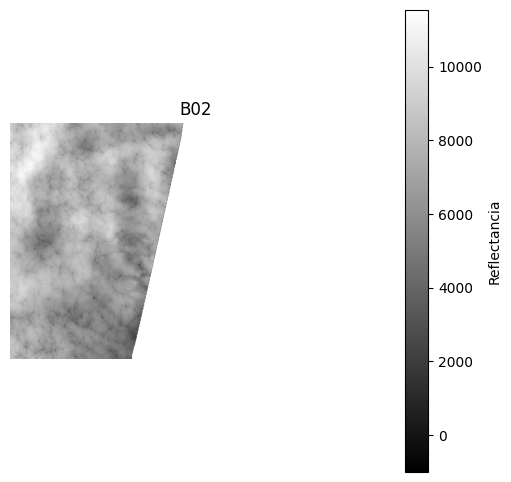

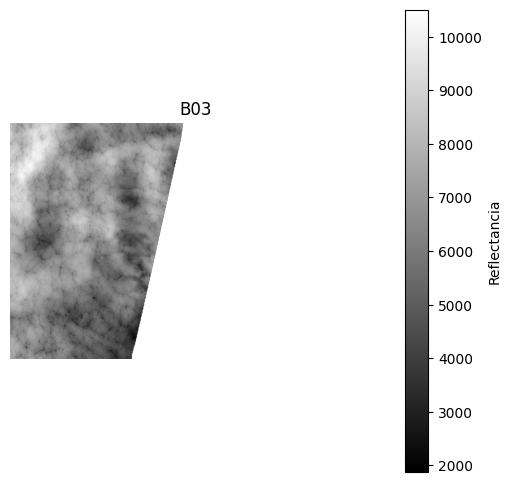

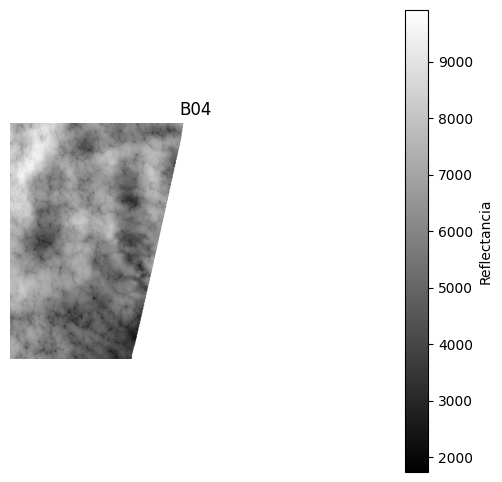

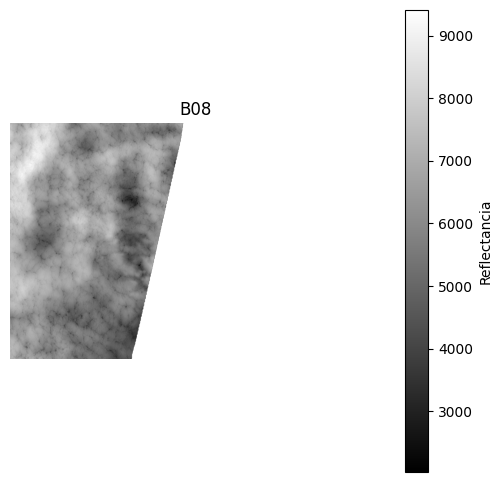

In [9]:
ruta_tif = "/content/Bandas_Atitlan.tif"

with rasterio.open(ruta_tif) as src:
    bandas = src.read()  # Lee todas las bandas
    nombres = src.descriptions if src.descriptions[0] else [f"Banda {i+1}" for i in range(src.count)]
    nodata = src.nodata

# Visualizar bandas individuales
for i in range(bandas.shape[0]):
    plt.figure(figsize=(6, 6))
    img = bandas[i]
    img = np.ma.masked_where(img == nodata, img)
    plt.imshow(img, cmap='gray')
    plt.title(f"{nombres[i]}")
    plt.axis('off')
    plt.colorbar(label="Reflectancia")
    plt.show()

In [10]:
with rasterio.open("/content/Bandas_Atitlan.tif") as src:
    print("Número de bandas:", src.count)
    print("Descripciones:", src.descriptions)

Número de bandas: 4
Descripciones: ('B02', 'B03', 'B04', 'B08')


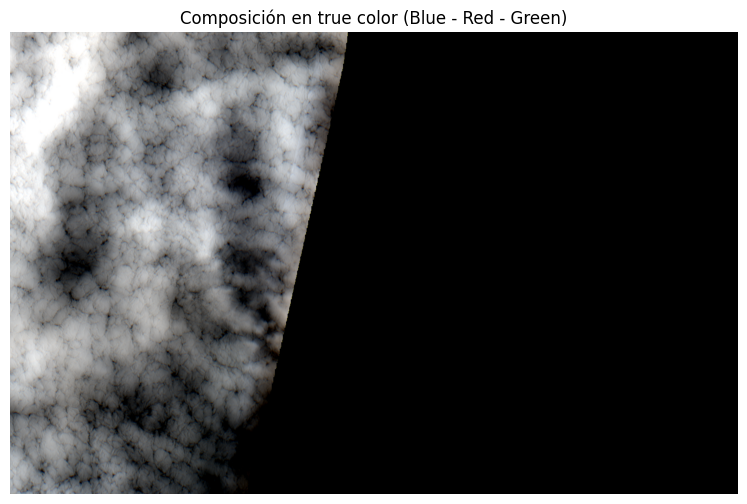

In [11]:
# Normalizador
def normalize(b):
    b_min, b_max = np.percentile(b[b > 0], (2, 98))
    return np.clip((b - b_min) / (b_max - b_min), 0, 1)

blue = bandas[0]   #B02
green = bandas[1]  # B03
red = bandas[2]    # B04
nir = bandas[3]    # B08

# Reasignar correctamente:
b = normalize(blue)  # B02
g = normalize(green)    # B03
r = normalize(red)    # B04
n = normalize(blue)    # B08

# Falso color (NIR, Red, Green)
rgb = np.dstack([r, g, b])

plt.figure(figsize=(10, 6))
plt.imshow(rgb)
plt.title("Composición en true color (Blue - Red - Green)")
plt.axis('off')
plt.show()


## Ejercicios: